# Lab 3

Навка Гліб, ІПС-41

In [1]:
student_index = 12
variant_index = (student_index + 4) % 5 + 1

print(f"variant: {variant_index}")

variant: 2


Tasks: 3, 4, 5, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 23, 24, 27

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_frame = pd.read_csv('NationalNames.csv').dropna()

#### 3. Get the column names of the dataset

In [4]:
data_frame.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

#### 4. Get general information about the data in the dataset

In [5]:
data_frame.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


#### 5. Find the number of unique names in a data set

In [6]:
unique_names = data_frame['Name'].nunique()
print(unique_names)

93889


#### 8. Find the most popular name by results of one year (the name for which the Count is maximum)

In [7]:
def get_the_most_popular_name(year: int):
    year_data_frame = data_frame[data_frame["Year"] == year]
    
    max_count = year_data_frame["Count"].max()
    name_data_frame = year_data_frame[year_data_frame["Count"] == max_count]

    return name_data_frame.iloc[0]["Name"]


year = 1947
the_most_popular_name = get_the_most_popular_name(year)

print(f"The name is '{the_most_popular_name}' in {year}")

The name is 'Linda' in 1947


#### 9. Count the number of records for which Count is the minimum in the set

In [8]:
data_frame.query(f"Count == {data_frame['Count'].min()}")["Id"].count()

254615

#### 11. Find the year with the most unique names

In [9]:
def get_year_with_most_unique_names():
    unique_names_by_year = data_frame.groupby("Year")["Name"].nunique()
    year_with_most_unique_names = unique_names_by_year.idxmax()

    return year_with_most_unique_names
    

get_year_with_most_unique_names()

2008

#### 12. Find the most popular name in the year with the most unique names (ie 2008)

In [10]:
get_the_most_popular_name(get_year_with_most_unique_names())

'Jacob'

#### 13. Find the year when the name 'Jacob' was the most popular female name

In [11]:
def get_year_when_name_is_the_most_popular(name, gender):
    name_data_frame = data_frame[(data_frame["Name"] == name) & (data_frame["Gender"] == gender)]

    max_count = name_data_frame["Count"].max()
    year_data_frame = name_data_frame[name_data_frame["Count"] == max_count]

    return year_data_frame

name = "Jacob"
gender = "F"

get_year_when_name_is_the_most_popular(name, gender)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


#### 14. Find the year with the most gender neutral names (same male and female names)

In [12]:
def get_year_with_the_most_popular_neutral_names():
    male_names = data_frame[data_frame["Gender"] == "M"].groupby(["Year", "Name"])["Count"].sum()
    female_names = data_frame[data_frame["Gender"] == "F"].groupby(["Year", "Name"])["Count"].sum()

    gender_neutral_names = male_names.index.intersection(female_names.index)
    male_names = male_names.loc[gender_neutral_names]
    gender_neutral_counts = male_names.groupby(level=0).count()

    return gender_neutral_counts.sort_values(ascending=False).head(n=1)


year_with_the_most_popular_neutral_names_data_frame = get_year_with_the_most_popular_neutral_names()

print(year_with_the_most_popular_neutral_names_data_frame.to_string(dtype=False))

Year
2008    2557


#### 16. Find the year when the most children were born

In [13]:
data_frame.groupby("Year")["Count"].sum().to_frame().idxmax().iloc[0]

1957

#### 17. Find the number of girls and boys born each year

In [14]:
data_frame.groupby(["Year", "Gender"])["Count"].sum().unstack().head(n=5)

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445


#### 18. Count the number of years when more girls were born, than boys

In [15]:
male_years = data_frame.query('Gender == "M"').groupby('Year')['Count'].sum()
female_years = data_frame.query('Gender == "F"').groupby('Year')['Count'].sum()

(female_years > male_years).sum()

54

#### 19. Draw a graph of the total number of births of boys and girls per year

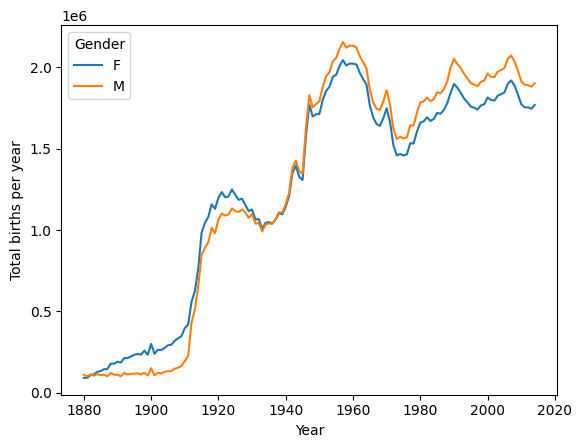

In [16]:
plot_data = data_frame.groupby(["Year", "Gender"])["Count"].sum()
unstacked_plot_data = plot_data.unstack()
unstacked_plot_data.plot()

plt.xlabel("Year")
plt.ylabel("Total births per year")

plt.show()

#### 20. Count the number of gender-neutral names (same for girls and boys)

In [17]:
male_names = data_frame.query("Gender == 'M'")["Name"].drop_duplicates()
female_names = data_frame.query("Gender == 'F'")["Name"].drop_duplicates()
gender_neutral_names = male_names.isin(female_names)

gender_neutral_names.sum()

10221

#### 22. Calculate how many years the observation was carried out

In [18]:
observation_year_count = data_frame["Year"].max() - data_frame["Year"].min()

f"Спостередження проводилось {observation_year_count} років"

'Спостередження проводилось 134 років'

#### 23. Find the most popular gender-neutral names (those present each year)

In [19]:
gender_neutral_names_data_frame = male_names[gender_neutral_names]
data_frame[data_frame.Name.isin(gender_neutral_names_data_frame)].groupby("Name").filter(lambda d: d["Year"].unique().size == observation_year_count).groupby("Name")["Count"].max().sort_values(ascending=False).to_frame()

,Count
Name,
Ashley,54840
Carol,34280
Madison,22158
Tracy,18467
Jordan,16128
...,...
Arie,94
Crawford,88
Lucious,76


#### 24. Find the most popular among unpopular names (unpopular the name that the children were called the most times )

In [20]:
unpopular_names_data_frame = data_frame[data_frame["Count"] == data_frame["Count"].min()]
grouped_unpopular_names = unpopular_names_data_frame.groupby("Name")["Count"].sum()

most_popular_name = grouped_unpopular_names.idxmax()
most_popular_count = grouped_unpopular_names.loc[grouped_unpopular_names.idxmax()]

f"Найбільш популярне з непопулярних імен - це {most_popular_name}. Їм називали {most_popular_count} разів"

'Найбільш популярне з непопулярних імен - це Celester. Їм називали 160 разів'

#### 27. Знайти найпопулярніші імена в кожному році

In [21]:
data_frame.groupby(['Year']).apply(lambda d: d[d.Count == d.Count.max()].iloc[0][['Name', 'Count']]).reset_index()

,Year,Name,Count
0,1880,John,9655
1,1881,John,8769
2,1882,John,9557
3,1883,John,8894
4,1884,John,9388
...,...,...,...
130,2010,Isabella,22883
131,2011,Sophia,21816
132,2012,Sophia,22267
133,2013,Sophia,21147
